In [211]:
!pip install keras
!pip install tensorflow
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [213]:
#Module 1 : data pre-processing and collection
import pandas as pd
import numpy as np

df = pd.read_csv("traffic.csv")
df.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [217]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [219]:
df.shape

(48120, 4)

In [221]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [70]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
df.head()

,DateTime,Junction,Vehicles,ID,hour,DayOfWeek,Month,Year
0,2015-11-01 00:00:00,1,15,20151101001,0,6,11,2015
1,2015-11-01 01:00:00,1,13,20151101011,1,6,11,2015
2,2015-11-01 02:00:00,1,10,20151101021,2,6,11,2015
3,2015-11-01 03:00:00,1,7,20151101031,3,6,11,2015
4,2015-11-01 04:00:00,1,9,20151101041,4,6,11,2015


In [72]:
df.tail()

,DateTime,Junction,Vehicles,ID,hour,DayOfWeek,Month,Year
48115,2017-06-30 19:00:00,4,11,20170630194,19,4,6,2017
48116,2017-06-30 20:00:00,4,30,20170630204,20,4,6,2017
48117,2017-06-30 21:00:00,4,16,20170630214,21,4,6,2017
48118,2017-06-30 22:00:00,4,22,20170630224,22,4,6,2017
48119,2017-06-30 23:00:00,4,12,20170630234,23,4,6,2017


In [74]:
!pip install holidays

In [75]:
import holidays
df['DateTime'] = pd.to_datetime(df['DateTime'])
indian_holidays = holidays.India(years=df['DateTime'].dt.year.unique())

# Custom function to check if the date is a holiday in India
def is_holiday_in_india(date):
    return date in indian_holidays

# Apply the custom function to the 'Date' column
df['IsHoliday'] = df['DateTime'].apply(lambda x: is_holiday_in_india(x))
df.head()

,DateTime,Junction,Vehicles,ID,hour,DayOfWeek,Month,Year,IsHoliday
0,2015-11-01 00:00:00,1,15,20151101001,0,6,11,2015,False
1,2015-11-01 01:00:00,1,13,20151101011,1,6,11,2015,False
2,2015-11-01 02:00:00,1,10,20151101021,2,6,11,2015,False
3,2015-11-01 03:00:00,1,7,20151101031,3,6,11,2015,False
4,2015-11-01 04:00:00,1,9,20151101041,4,6,11,2015,False


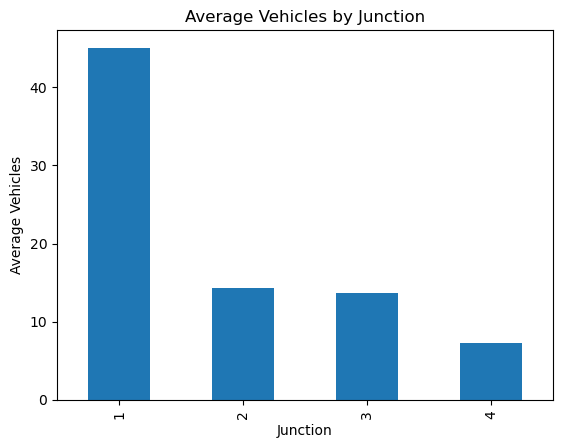

In [76]:
#module 2: data analysis and visualization

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

df.groupby('Junction')['Vehicles'].mean().plot(kind='bar')
plt.xlabel('Junction')
plt.ylabel('Average Vehicles')
plt.title('Average Vehicles by Junction')
plt.show()

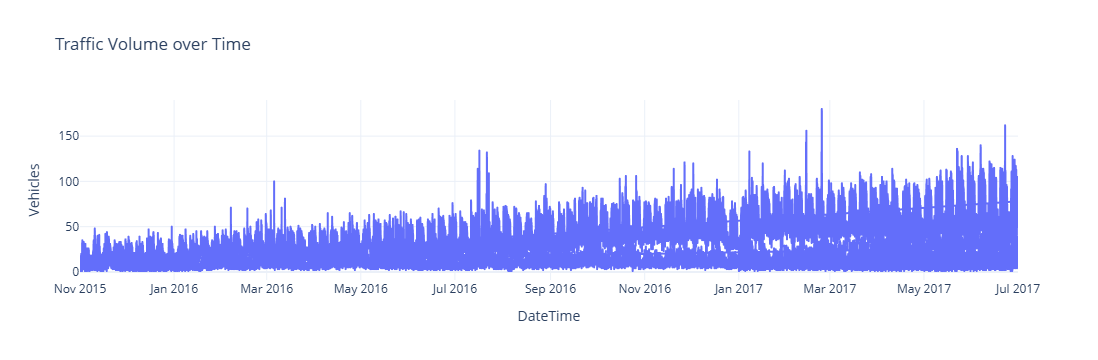

In [77]:
pio.templates.default = "plotly_white"
fig = px.line(df, x='DateTime', y='Vehicles', title='Traffic Volume over Time')
fig.show()

In [78]:
#analysing using t-test hypothesis
from scipy.stats import ttest_ind
junction_1 = df[df['Junction'] == 1]['Vehicles']
junction_2 = df[df['Junction'] == 2]['Vehicles']
t_stat, p_value = ttest_ind(junction_1, junction_2)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 153.93470815373487, p-value: 0.0


In [79]:
#splitting the data
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

# Printing the sizes of the training and testing sets
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 38496
Testing set size: 9624


In [81]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
df.head()

,DateTime,Junction,Vehicles,ID,hour,DayOfWeek,Month,Year,IsHoliday
0,2015-11-01 00:00:00,1,15,20151101001,0,6,11,2015,False
1,2015-11-01 01:00:00,1,13,20151101011,1,6,11,2015,False
2,2015-11-01 02:00:00,1,10,20151101021,2,6,11,2015,False
3,2015-11-01 03:00:00,1,7,20151101031,3,6,11,2015,False
4,2015-11-01 04:00:00,1,9,20151101041,4,6,11,2015,False


In [84]:
# Converting 'Vehicles' column to float
df['Vehicles'] = df['Vehicles'].astype(float)

# Normalizing 'Vehicles' column using MinMaxScaler
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])
df.head()

,DateTime,Junction,Vehicles,ID,hour,DayOfWeek,Month,Year,IsHoliday
0,2015-11-01 00:00:00,1,0.078212,20151101001,0,6,11,2015,False
1,2015-11-01 01:00:00,1,0.067039,20151101011,1,6,11,2015,False
2,2015-11-01 02:00:00,1,0.050279,20151101021,2,6,11,2015,False
3,2015-11-01 03:00:00,1,0.033520,20151101031,3,6,11,2015,False
4,2015-11-01 04:00:00,1,0.044693,20151101041,4,6,11,2015,False


In [86]:
# Convert the 'Date' column to numeric features
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour

# Drop the original 'Date' column since it's no longer needed
df.drop(columns=['DateTime'], inplace=True)

# Check if all columns are now numeric
print(df.dtypes)

Junction       int64
Vehicles     float64
ID             int64
hour           int32
DayOfWeek      int32
Month          int32
Year           int32
IsHoliday       bool
Day            int32
dtype: object


In [87]:
# Convert 'IsHoliday' column to numeric format
df['IsHoliday'] = df['IsHoliday'].astype(int)
df.head()

,Junction,Vehicles,ID,hour,DayOfWeek,Month,Year,IsHoliday,Day
0,1,0.078212,20151101001,0,6,11,2015,0,1
1,1,0.067039,20151101011,1,6,11,2015,0,1
2,1,0.050279,20151101021,2,6,11,2015,0,1
3,1,0.033520,20151101031,3,6,11,2015,0,1
4,1,0.044693,20151101041,4,6,11,2015,0,1


In [92]:
sequence_length = 24 
X_columns = ['Junction', 'Vehicles', 'DayOfWeek', 'Month', 'Year', 'IsHoliday']
y_column = 'Vehicles'

# Splitting the data into input sequences (X) and labels (y)
X = []
y = []
data_array = df.values
data_array = df[X_columns + [y_column]].values
for i in range(len(data_array) - sequence_length):
    X.append(data_array[i:i + sequence_length, :-1])  # Exclude last column
    y.append(data_array[i + sequence_length,-1])  # Last column is target 'Vehicles'

X = np.array(X)
y = np.array(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#model demonstrates strong predictive capabilities for traffic forecasting. 
#Its accurate predictions and low error metrics make it a valuable tool for traffic management and infrastructure planning in smart cities.

In [223]:
data=pd.read_csv("traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [225]:
data['DateTime']=pd.to_datetime(data['DateTime'])

data["Year"]=data['DateTime'].dt.year

data["Month"]=data['DateTime'].dt.month

data["Date_no"]=data['DateTime'].dt.day

data["Hour"]=data['DateTime'].dt.hour

data["Day"]= data['DateTime'].dt.strftime("%A")
data

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,Friday
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,Friday
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,Friday
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,Friday


<Axes: xlabel='Date_no', ylabel='Vehicles'>

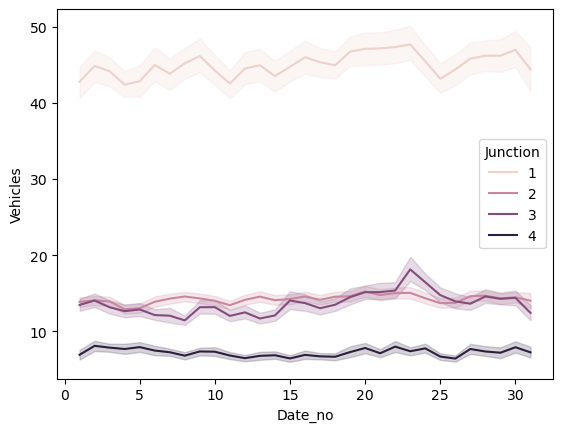

In [228]:
sns.lineplot(x=data['Date_no'],y="Vehicles",data=data,hue='Junction')

In [229]:
# Filter the 'data' DataFrame to include only rows where 'Junction' equals 1.
# This step is used to focus on a specific subset of the data relevant to your analysis.
data = data[(data['Junction'] == 1)]
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

In [230]:
df_N, av, std = Normalize(data, "Vehicles")
Diff = Difference(df_N, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N = df_N[24*7:]
df_N.columns = ["Norm"]
df_N["Diff"]= Diff
df = df_N["Diff"].dropna()
df = df.to_frame()
df.head()

,Diff
168,-0.086925
169,0.130387
170,0.043462
171,0.043462
172,0.043462


In [270]:
def Split_data(df):
    training_size = int(len(df)*0.80)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len] 
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test

df_train, df_test = Split_data(df)

In [243]:

#Transform the DataFrame into a format suitable for time series forecasting.
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y
#Reshape the input data to the format expected by LSTM models.
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

X_train, y_train = TnF(df_train)
X_test, y_test = TnF(df_test)
X_train, X_test = FeatureFixShape(X_train, X_test)

In [245]:
#MODULE-3 Modal prediction in GRU,LSTM and MLP
X_train, X_test = FeatureFixShape(X_train, X_test)
from sklearn.metrics import mean_absolute_error

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
 # Create and train a Multi-Layer Perceptron (MLP) model for regression.
def MLP_model(X_Train, y_Train, X_Test, y_Test):
    X_Train = np.squeeze(X_Train)  # This line removes the unnecessary dimension
    X_Test = np.squeeze(X_Test)    # Do the same for the test data
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True) 
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=X_Train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu', input_dim=X_Train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train, y_Train, validation_data=(X_test, y_test), epochs=50, batch_size=120, callbacks=[early_stopping])
    pred_MLP = model.predict(X_Test)
    return pred_MLP


In [247]:
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def MAE_Value(test,predicted):
    mae = mean_absolute_error(test, predicted)
    print("The MAE is {}.".format(mae))
    return mae

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5))
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted,label="Predicted Values")
    plt.title("Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

In [249]:
Pred_MLP = MLP_model(X_train,y_train,X_test, y_test)

Epoch 1/50


C:\Users\suman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1115 - val_loss: 0.0671
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0598 - val_loss: 0.0632
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0563 - val_loss: 0.0616
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0545 - val_loss: 0.0599
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0518 - val_loss: 0.0592
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0475 - val_loss: 0.0589
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0515 - val_loss: 0.0582
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0493 - val_loss: 0.0579
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0474 - val_loss: 0.0574
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0481 - val_loss: 0.0573
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0492 - val_loss: 0.0569
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0466 - val_loss: 0.0575


The root mean squared error is 0.23849510970192822.
The MAE is 0.1708844054358568.


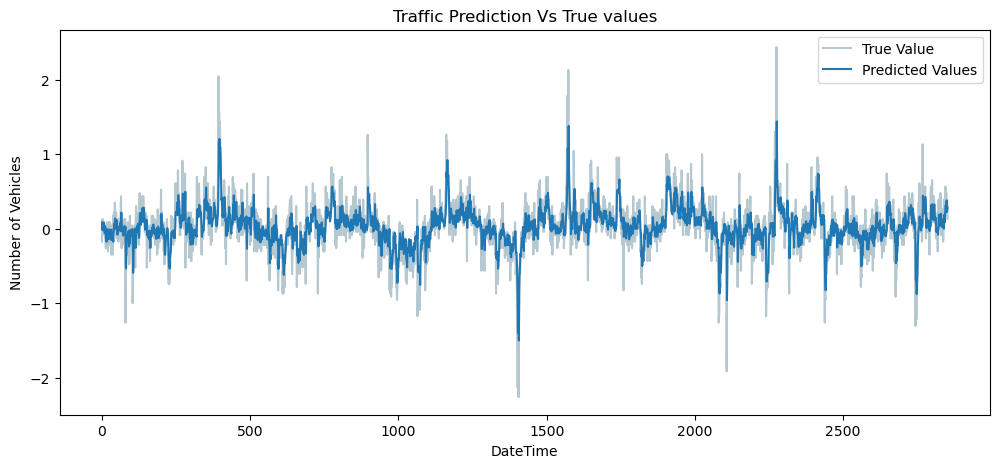

In [251]:
colors = ["#6D91A1","#74B3CE1","#536D7A","#3E535B"]
RMSE_MLP = RMSE_Value(y_test, Pred_MLP)
MAE_MLP = MAE_Value(y_test, Pred_MLP)
PredictionsPlot(y_test, Pred_MLP, 0)

In [253]:
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed

def Sub_Plots(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True)
    fig.suptitle(title)
    
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")
    
    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#3E535B")
    axes[1].set(ylabel ="Original")

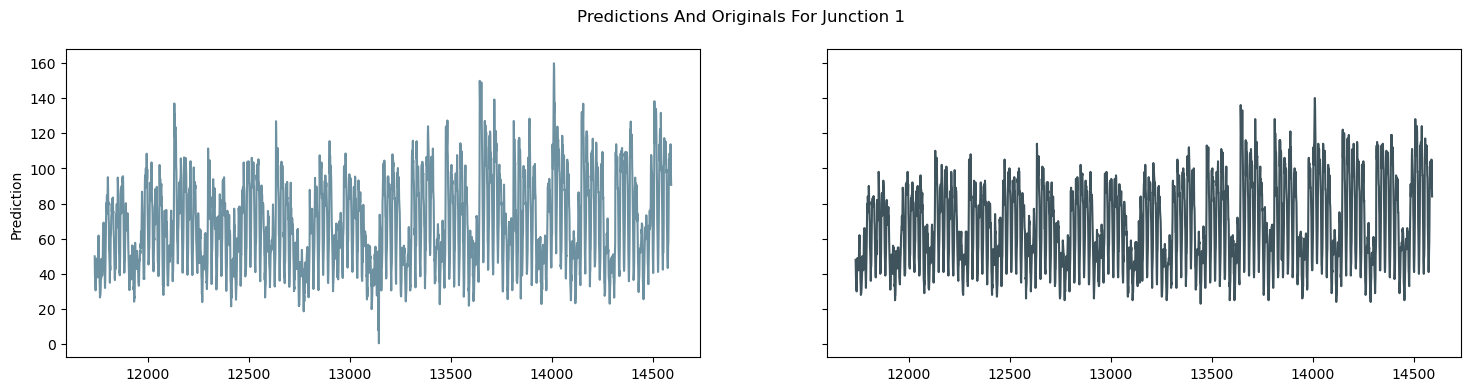

In [255]:
recover = df_N.Norm[-2854:-1].to_frame()
recover["Pred"]= globals()[f"Pred_MLP"]
Transform_reverssed = inverse_difference(recover.Norm, recover.Pred).to_frame()
Transform_reverssed.columns = ["Pred_Normed"]
Final_Pred = (Transform_reverssed.values* std) + av
Transform_reverssed["Pred_Final"] = Final_Pred
Sub_Plots(Transform_reverssed["Pred_Final"], data[-2854:-1],"Predictions And Originals For Junction 1", 0)

In [257]:
def GRU_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True) 
    #callback delta 0.01 may interrupt the learning.
    
    #The GRU(Gated Recurrent Unit) model 
    model = Sequential()
    model.add(GRU(units=100, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=20, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120,callbacks=[early_stopping])
    pred_GRU= model.predict(X_Test)
    return pred_GRU

In [262]:
Pred_GRU = GRU_model(X_train,y_train,X_test,y_test)

Epoch 1/50


C:\Users\suman\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0709 - val_loss: 0.0633
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0487 - val_loss: 0.0614
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0503 - val_loss: 0.0602
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0463 - val_loss: 0.0594
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0459 - val_loss: 0.0585
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0447 - val_loss: 0.0577
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0430 - val_loss: 0.0573
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0449 - val_loss: 0.0571
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0452 - val_loss: 0.0567
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0461 - val_loss: 0.0566
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0440 - val_loss: 0.0563
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0450 - val_l

The root mean squared error is 0.23730333630001665.
The MAE is 0.17182766327936985.


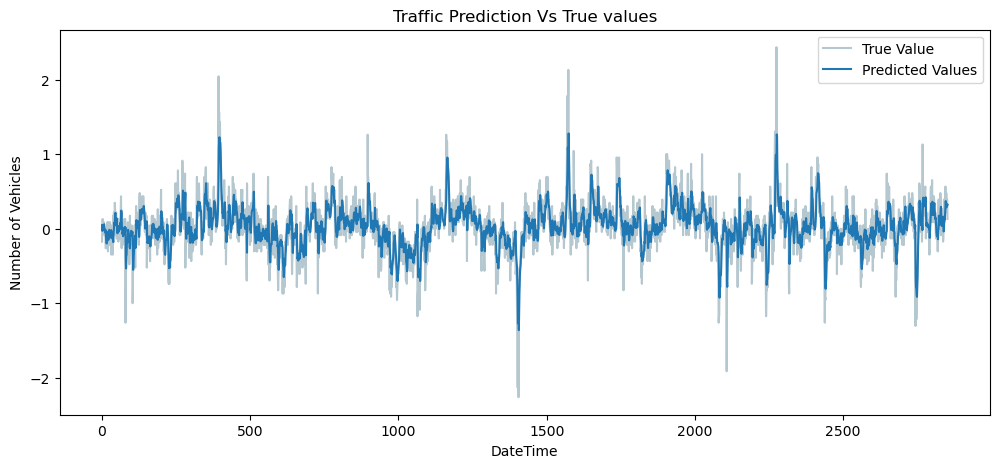

In [263]:
RMSE_GRU = RMSE_Value(y_test, Pred_GRU)
MAE_GRU = MAE_Value(y_test, Pred_GRU)
PredictionsPlot(y_test, Pred_GRU, 0)

In [294]:
def LSTM_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True) 
    
    #The LSTM(Long Short Term Memory) model 
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=20, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120,callbacks=[early_stopping])
    pred_LSTM = model.predict(X_Test)
    return pred_LSTM

In [ ]:
Pred_LSTM = LSTM_model(X_train,y_train,X_test, y_test)

C:\Users\suman\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - loss: 0.0740 - val_loss: 0.0830
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.0592 - val_loss: 0.0803
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0587 - val_loss: 0.0758
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0556 - val_loss: 0.0734
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0570 - val_loss: 0.0720
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.0529 - val_loss: 0.0704
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0528 - val_loss: 0.0694
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.0534 - val_loss: 0.0675
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0497 - val_loss: 0.0662
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0482 - val_loss: 0.0651
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0493 - val_loss: 0.0641
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - los

In [ ]:
RMSE_LSTM = RMSE_Value(y_test, Pred_LSTM)
MAE_LSTM = MAE_Value(y_test, Pred_LSTM)
PredictionsPlot(y_test, Pred_LSTM, 0)

In [ ]:
#Value predicted